<a href="https://colab.research.google.com/github/ValentinLettermann/SA25-Introduction-to-Scientific-Programming-with-Python/blob/main/TP1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Remote Sensing - 09/10/2025
Valentin Lettermann

Importing libraies

In [9]:
!pip install --quiet rasterio scikit-image matplotlib numpy

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

Visualizing a GeoTIFF file in Python

In [13]:

# Read GeoTIFF image files
B = rasterio.open('/content/LC08_L1TP_195028_20230820_20230826_02_T1_B2.TIF').read(1)
G = rasterio.open('/content/LC08_L1TP_195028_20230820_20230826_02_T1_B3.TIF').read(1)
R = rasterio.open('/content/LC08_L1TP_195028_20230820_20230826_02_T1_B4.TIF').read(1)
B10 = rasterio.open('/content/LC08_L1TP_195028_20230820_20230826_02_T1_B10.TIF').read(1)


(np.float64(-0.5), np.float64(7920.5), np.float64(8030.5), np.float64(-0.5))

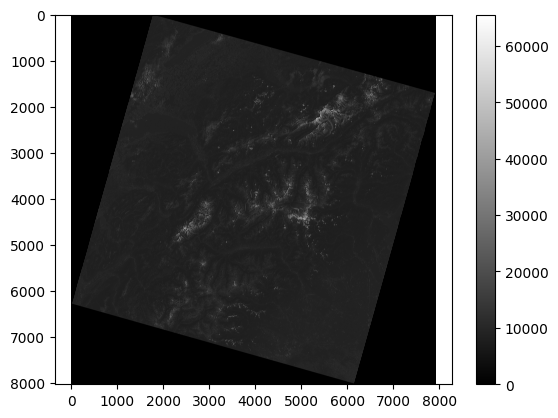

In [14]:

# Display image with contrast adjustment
plt.figure()
plt.imshow(exposure.adjust_gamma(B, 1), cmap='gray')
plt.colorbar()
plt.axis('equal')


(np.float64(-0.5), np.float64(7920.5), np.float64(8030.5), np.float64(-0.5))

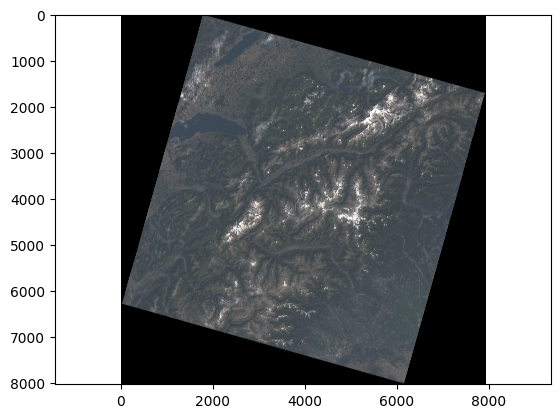

In [15]:

# Create RGB composite image
RGB = np.float32(np.dstack((R, G, B)))
RGB /= RGB.max()
plt.figure()
plt.imshow(RGB * 2.5)
plt.axis('equal')


Calculation of radiant temperatures

In [17]:
# Convert B10 to double-precision for numerical calculations
B10 = B10.astype(np.float64)

# Constants (replace Ml, Al, K1, K2 with actual values)
Ml = 0.0003342  # Example value
Al = 0.1        # Example value
K1 = 774.8853   # Example value
K2 = 1321.0789  # Example value

# Calculate at-sensor radiance using gain (Ml) and offset (Al)
L_lambda = Ml * B10 + Al

# Convert radiance to temperature in Kelvin using constants K1 and K2
T_K = K2 / (np.log((K1 / L_lambda) + 1))

# Convert temperature from Kelvin to Celsius
T_C = T_K - 273.15


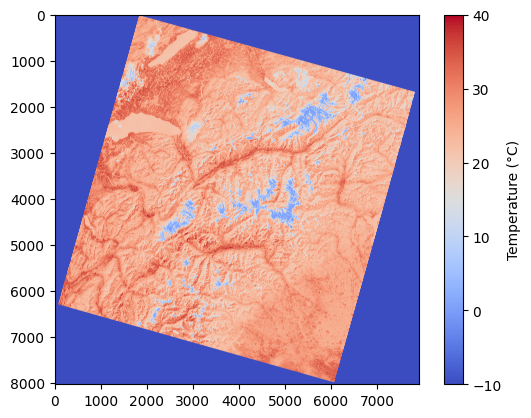

In [18]:
# Display temperature image
plt.figure(3)
plt.imshow(T_C, cmap='coolwarm', vmin = -10,vmax = 40)
plt.colorbar(label='Temperature (°C)')
plt.show()


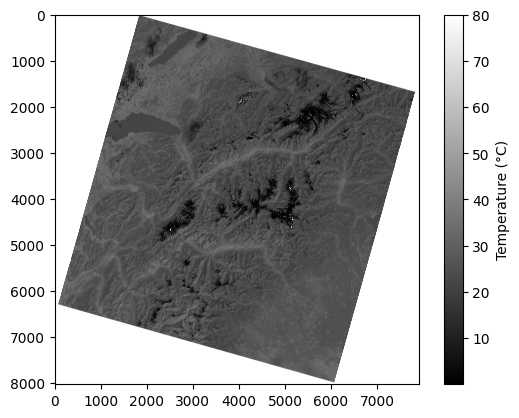

In [19]:
T_C_thr = T_C.copy()
T_C_thr[T_C_thr <= 0] = 80

plt.figure()
plt.imshow(T_C_thr, cmap='grey')
plt.colorbar(label='Temperature (°C)')
plt.show()

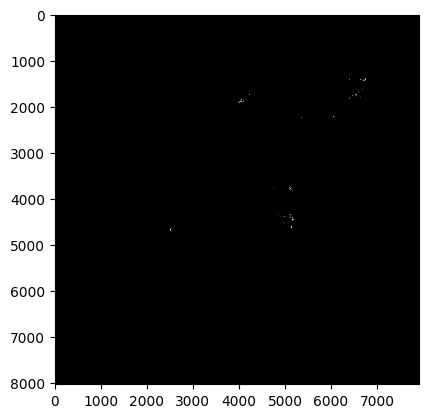

Number of pixels with temperature between 0 and -125 °C: 13097
Area with temperature between 0 and -125 °C: 11787300 m²
Area with temperature between 0 and -125 °C: 11.7873 km²


In [21]:
mask = T_C<-125
over0 = T_C>0
pix = ~mask & ~over0

plt.figure()
plt.imshow(pix, cmap='gray')
plt.show()

nbzeropix = np.sum(pix)
print(f'Number of pixels with temperature between 0 and -125 °C: {nbzeropix}')

areaunder0 = nbzeropix * 30 * 30  # in m²
print(f'Area with temperature between 0 and -125 °C: {areaunder0} m²')

areaunder0 = areaunder0 / 1000 / 1000 # in km²
print(f'Area with temperature between 0 and -125 °C: {areaunder0} km²')